<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9E%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%82%D0%B8%D0%BF%D0%B0_%D0%BC%D0%B0%D1%80%D0%BA%D0%B5%D1%80%D0%B0_ArUco_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_OpenCV_%D0%B8_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение типа маркера ArUco с помощью OpenCV и Python

# Defining an ArUco token type using OpenCV and Python

В этом уроке вы узнаете, как автоматически определять тип / словарь маркера ArUco с помощью OpenCV и Python.

In this tutorial, you will learn how to automatically detect ArUco marker type / vocabulary using OpenCV and Python.

Без знания используемого словаря ArUco вы не сможете обнаружить их в своих изображениях / видео.

Without knowing the ArUco vocabulary used, you will not be able to detect them in your images / videos.

Реализуем код, который будет определять тип словаря.

Let's implement the code that will determine the type of the dictionary.

### Download the code zip file

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_6.Determining_ArUco_marker_type.zip
!unzip -qq Lesson_6.Determining_ArUco_marker_type.zip
%cd /content/Lesson_6.Determining_ArUco_marker_type/opencv-guess-aruco-type

--2022-02-11 06:54:05--  http://dataudt.ru/datasets/cv/Lesson_6.Determining_ArUco_marker_type.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31363817 (30M) [application/zip]
Saving to: ‘Lesson_6.Determining_ArUco_marker_type.zip’

Lesson_6.Determinin 100%[===================>]  29.91M  13.4MB/s    in 2.2s    

2022-02-11 06:54:08 (13.4 MB/s) - ‘Lesson_6.Determining_ArUco_marker_type.zip’ saved [31363817/31363817]

/content/Lesson_6.Determining_ArUco_marker_type/opencv-guess-aruco-type


### Импорт библиотек

### Import Packages



In [2]:
# импортируем необходимые библиотеки
# import the necessary packages
import matplotlib.pyplot as plt
import imutils
import cv2

### Функция для отображения изображений в блокнотах Jupyter Notebooks и Google Colab

### Function to display images in Jupyter Notebooks and Google Colab




In [3]:
def plt_imshow(title, image):
    # конвертируем изображение из формата BGR в RGB и отображаем его 
    # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Реализация нашего идентификатора типа маркера ArUco/AprilTag


### Implementing our ArUco/AprilTag marker type identifier




In [4]:
# явно укажем аргументы необходимые для работы
# image - путь к изображению 

# explicitly specify the arguments needed to work
# image - image path 
args = {
	"image": "images/example_01.png"
}

In [5]:
# определяем имена для каждого возможного тега ArUco, поддерживаемого OpenCV
# define names of each possible ArUco tag OpenCV supports
ARUCO_DICT = {
	"DICT_4X4_50": cv2.aruco.DICT_4X4_50,
	"DICT_4X4_100": cv2.aruco.DICT_4X4_100,
	"DICT_4X4_250": cv2.aruco.DICT_4X4_250,
	"DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
	"DICT_5X5_50": cv2.aruco.DICT_5X5_50,
	"DICT_5X5_100": cv2.aruco.DICT_5X5_100,
	"DICT_5X5_250": cv2.aruco.DICT_5X5_250,
	"DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
	"DICT_6X6_50": cv2.aruco.DICT_6X6_50,
	"DICT_6X6_100": cv2.aruco.DICT_6X6_100,
	"DICT_6X6_250": cv2.aruco.DICT_6X6_250,
	"DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
	"DICT_7X7_50": cv2.aruco.DICT_7X7_50,
	"DICT_7X7_100": cv2.aruco.DICT_7X7_100,
	"DICT_7X7_250": cv2.aruco.DICT_7X7_250,
	"DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
	"DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
	"DICT_APRILTAG_16h5": cv2.aruco.DICT_APRILTAG_16h5,
	"DICT_APRILTAG_25h9": cv2.aruco.DICT_APRILTAG_25h9,
	"DICT_APRILTAG_36h10": cv2.aruco.DICT_APRILTAG_36h10,
	"DICT_APRILTAG_36h11": cv2.aruco.DICT_APRILTAG_36h11
}

[INFO] loading image...
[INFO] detected 2 markers for 'DICT_ARUCO_ORIGINAL'


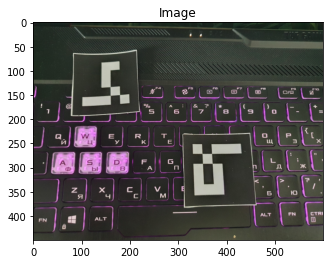

In [6]:
# загружаем входное изображение и изменяем его размер
# load the input image from disk and resize it
print("[INFO] loading image...")
image = cv2.imread(args["image"])
image = imutils.resize(image, width=600)

# проходимся циклом через все типа словарей ArUco
# loop over the types of ArUco dictionaries
for (arucoName, arucoDict) in ARUCO_DICT.items():
    # загружаем словарь ArUCo, находим параметры и
	# пытаемся обнаружить маркеры для текущего словаря
	# load the ArUCo dictionary, grab the ArUCo parameters, and
	# attempt to detect the markers for the current dictionary
	arucoDict = cv2.aruco.Dictionary_get(arucoDict)
	arucoParams = cv2.aruco.DetectorParameters_create()
	(corners, ids, rejected) = cv2.aruco.detectMarkers(
		image, arucoDict, parameters=arucoParams)

    # если был обнаружен хотя бы один маркер ArUco,
	# отображаем имя ArUco в наш терминал
	# if at least one ArUco marker was detected display the ArUco
	# name to our terminal
	if len(corners) > 0:
		print("[INFO] detected {} markers for '{}'".format(
			len(corners), arucoName))
plt_imshow("Image", image)